In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test)= mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


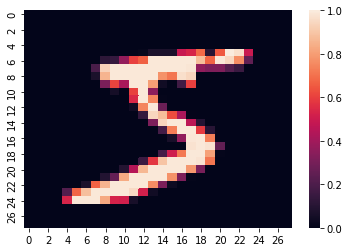

In [ ]:
sns.heatmap(x_train[0])
plt.show()

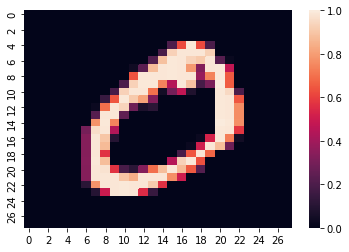

In [ ]:
sns.heatmap(x_train[1])
plt.show()

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.452232  , -0.50515074,  0.67238754, -0.36499038,  0.17748761,
        -0.27881896,  0.25320745, -0.78876114, -0.32258704, -0.6118622 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.07186506, 0.06816092, 0.22127575, 0.07841629, 0.13489676,
        0.08547322, 0.14550778, 0.05132926, 0.08181291, 0.06126201]],
      dtype=float32)

In [ ]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer="adam",loss=loss_fn,metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1097 - accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0882 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0751 - accuracy: 0.9763


In [ ]:
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0656 - accuracy: 0.9796
Epoch 2/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0570 - accuracy: 0.9824
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0549 - accuracy: 0.9822
Epoch 4/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 5/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0439 - accuracy: 0.9858
Epoch 6/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0415 - accuracy: 0.9863
Epoch 7/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0383 - accuracy: 0.9875


In [ ]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0759 - accuracy: 0.9795 - 564ms/epoch - 2ms/step


[0.07589706778526306, 0.9794999957084656]

In [ ]:
val=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0680 - val_accuracy: 0.9821
Epoch 2/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0650 - val_accuracy: 0.9828
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0642 - val_accuracy: 0.9824
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0645 - val_accuracy: 0.9826
Epoch 5/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0641 - val_accuracy: 0.9828


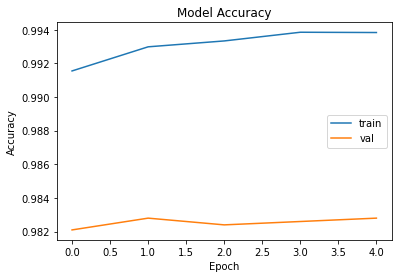

In [ ]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()